In [1]:
import pandas as pd
import numpy as np
from requests_html import HTMLSession
import csv
import wfdb
from matplotlib import pyplot as plt
from biosppy.signals import ecg
from scipy.signal import find_peaks

In [2]:
api='b001.hea'
url='https://physionet.org/physiobank/database/cebsdb/'+api
session=HTMLSession()
response=session.get(url)
data=response.content

with open('b001.hea', 'wb') as f:
    f.write(data)

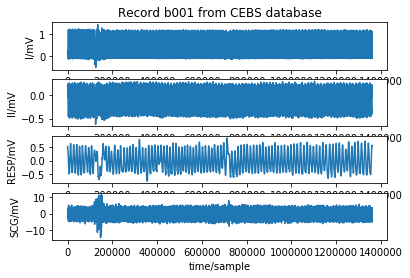

{'record_name': 'b001',
 'n_sig': 4,
 'fs': 5000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1360050,
 'base_time': None,
 'base_date': None,
 'comments': ['Baseline for subject 1'],
 'sig_name': ['I', 'II', 'RESP', 'SCG'],
 'p_signal': array([[ 0.16297957,  0.18371695,  0.52520144, -0.18313714],
        [ 0.16268303,  0.18371695,  0.52520144, -0.18313714],
        [ 0.16268303,  0.18402153,  0.52520144, -0.18313714],
        ...,
        [ 0.02410888, -0.30333371,  0.55450547, -4.97434578],
        [ 0.01648774, -0.29815585,  0.55450547, -5.00480095],
        [ 0.00886661, -0.29326873,  0.55450547, -5.03525613]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['b001.dat', 'b001.dat', 'b001.dat', 'b001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'samps_per_frame': [1, 1, 1, 1],
 'skew': [None, None, None, None],
 'byte_offset': [None, None, None, None],
 'adc_gain': [33722.0181, 72230.6799, 40950.0021, 2462.6354],
 'baseline': [-14974, 11980, -

In [3]:
record = wfdb.rdrecord('b001') 
wfdb.plot_wfdb(record=record, title='Record b001 from CEBS database')
display(record.__dict__)

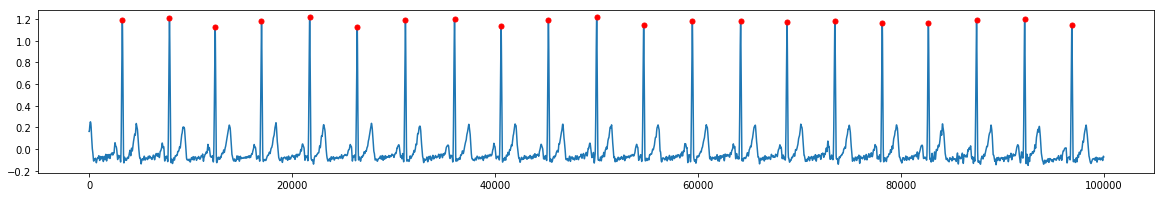

In [4]:
signals,fields=wfdb.rdsamp('b001',channels=[0],sampfrom=0,sampto=100000)

x=np.arange(100000)
signals=signals.flatten()
plt.figure(figsize=(20, 3)) 
r_index,_=find_peaks(signals,distance=4500)
plt.plot(x,signals)
plt.plot(r_index,signals[r_index],marker="o",ls="",ms=5,color='r')

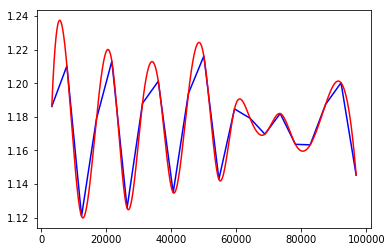

In [5]:
from scipy.interpolate import interp1d
r_index_new = np.linspace(np.min(r_index),np.max(r_index),100000)
f = interp1d(r_index,signals[r_index], kind='cubic')
plt.plot(r_index,signals[r_index], label="Original", color='blue')
plt.plot(r_index_new, f(r_index_new), label="Interpolated", color='red')


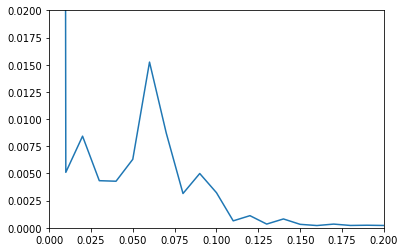

In [19]:
n=len(x)
freq=np.fft.fftfreq(n,d=1/1000)
freq=freq[range(n//2)]
Y=np.fft.fft(f(r_index_new))/n
Y=Y[range(n//2)]
plt.xlim(0,0.2) 
plt.ylim(0, 0.02)
plt.plot(freq,abs(Y))
plt.show()

In [7]:
api='m001.dat'
url='https://physionet.org/physiobank/database/cebsdb/'+api
session=HTMLSession()
response=session.get(url)
data=response.content

with open('m001.dat', 'wb') as f:
    f.write(data)

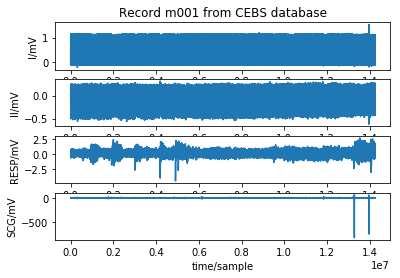

{'record_name': 'm001',
 'n_sig': 4,
 'fs': 5000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 14246750,
 'base_time': None,
 'base_date': None,
 'comments': ['Long measurement for subject 1'],
 'sig_name': ['I', 'II', 'RESP', 'SCG'],
 'p_signal': array([[-9.30910096e-02, -5.43232542e-02,  0.00000000e+00,
          2.43987736e-01],
        [-9.30910096e-02, -5.43232542e-02,  0.00000000e+00,
          3.11762107e-01],
        [-9.30910096e-02, -5.40108884e-02, -3.30103389e-04,
          3.38871855e-01],
        ...,
        [-4.67073084e-02,  2.28878949e-02, -2.19408719e-01,
          2.16877987e-01],
        [-4.64106685e-02,  2.32002607e-02, -2.19408719e-01,
          2.16877987e-01],
        [-4.64106685e-02,  2.32002607e-02, -2.19738823e-01,
          2.16877987e-01]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['m001.dat', 'm001.dat', 'm001.dat', 'm001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'samps_per_frame': [1, 1, 1, 1],
 'skew': [

In [8]:
record = wfdb.rdrecord('m001') 
wfdb.plot_wfdb(record=record, title='Record m001 from CEBS database')
display(record.__dict__)

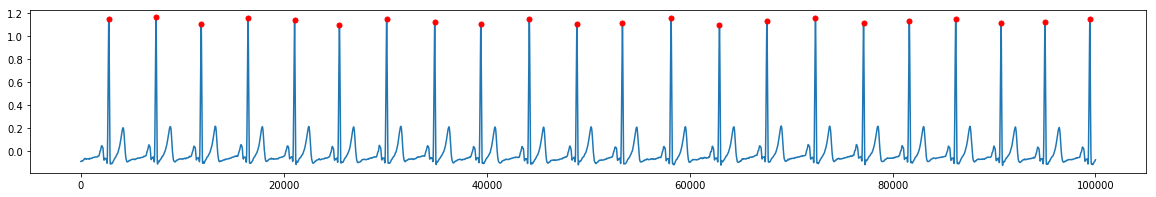

In [9]:
signals,fields=wfdb.rdsamp('m001',channels=[0],sampfrom=0,sampto=100000)

x=np.arange(100000)
signals=signals.flatten()
plt.figure(figsize=(20, 3)) 
r_index,_=find_peaks(signals,distance=4000)
plt.plot(x,signals)
plt.plot(r_index,signals[r_index],marker="o",ls="",ms=5,color='r')

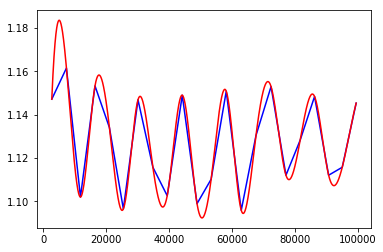

In [10]:
from scipy.interpolate import interp1d
r_index_new = np.linspace(np.min(r_index),np.max(r_index),100000)
f = interp1d(r_index,signals[r_index], kind='cubic')
plt.plot(r_index,signals[r_index], label="Original", color='blue')
plt.plot(r_index_new, f(r_index_new), label="Interpolated", color='red')


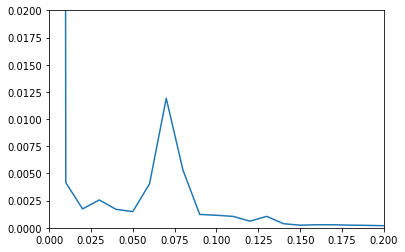

In [11]:
n=len(x)
freq=np.fft.fftfreq(n,d=1/1000)
freq=freq[range(n//2)]
Y=np.fft.fft(f(r_index_new))/n
Y=Y[range(n//2)]
plt.xlim(0,0.2) 
plt.ylim(0, 0.02)
plt.plot(freq,abs(Y))
plt.show()

In [12]:
api='p001.dat'
url='https://physionet.org/physiobank/database/cebsdb/'+api
session=HTMLSession()
response=session.get(url)
data=response.content

with open('p001.dat', 'wb') as f:
    f.write(data)

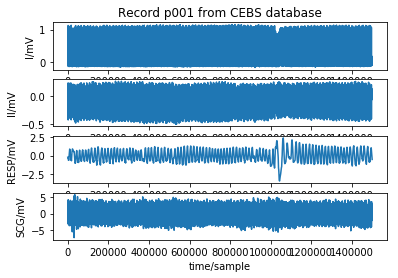

{'record_name': 'p001',
 'n_sig': 4,
 'fs': 5000,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 1500000,
 'base_time': None,
 'base_date': None,
 'comments': ['After music listening for subject 1'],
 'sig_name': ['I', 'II', 'RESP', 'SCG'],
 'p_signal': array([[-0.05401741, -0.02410962, -0.22583614,  0.06103516],
        [-0.05431784, -0.02410962, -0.22610617,  0.09155273],
        [-0.05431784, -0.02410962, -0.22610617,  0.12207031],
        ...,
        [-0.02593717,  0.00122432, -0.53133149, -0.42724609],
        [-0.02533631,  0.00151862, -0.53160152, -0.42724609],
        [-0.02503588,  0.00213078, -0.53160152, -0.39672852]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['p001.dat', 'p001.dat', 'p001.dat', 'p001.dat'],
 'fmt': ['16', '16', '16', '16'],
 'samps_per_frame': [1, 1, 1, 1],
 'skew': [None, None, None, None],
 'byte_offset': [None, None, None, None],
 'adc_gain': [49928.3449, 84945.3367, 11109.8252, 4947.968],
 'baseline': [-249

In [13]:
record = wfdb.rdrecord('p001') 
wfdb.plot_wfdb(record=record, title='Record p001 from CEBS database')
display(record.__dict__)

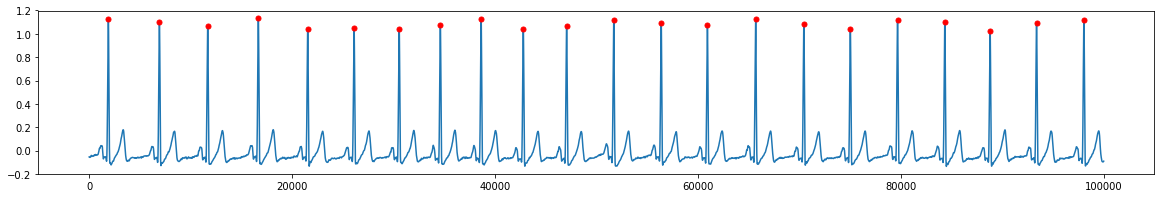

In [14]:
signals,fields=wfdb.rdsamp('p001',channels=[0],sampfrom=0,sampto=100000)

x=np.arange(100000)
signals=signals.flatten()
plt.figure(figsize=(20, 3)) 
r_index,_=find_peaks(signals,distance=4000)
plt.plot(x,signals)
plt.plot(r_index,signals[r_index],marker="o",ls="",ms=5,color='r')

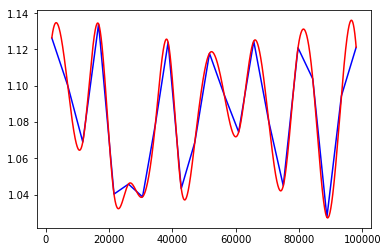

In [15]:
from scipy.interpolate import interp1d
r_index_new = np.linspace(np.min(r_index),np.max(r_index),100000)
f = interp1d(r_index,signals[r_index], kind='cubic')
plt.plot(r_index,signals[r_index], label="Original", color='blue')
plt.plot(r_index_new, f(r_index_new), label="Interpolated", color='red')


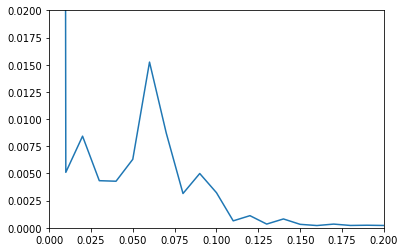

In [16]:
n=len(x)
freq=np.fft.fftfreq(n,d=1/1000)
freq=freq[range(n//2)]
Y=np.fft.fft(f(r_index_new))/n
Y=Y[range(n//2)]
plt.xlim(0,0.2) 
plt.ylim(0, 0.02)
plt.plot(freq,abs(Y))
plt.show()